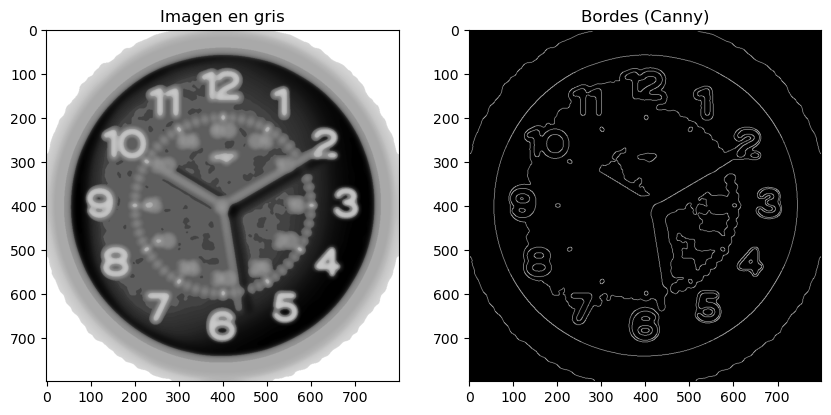

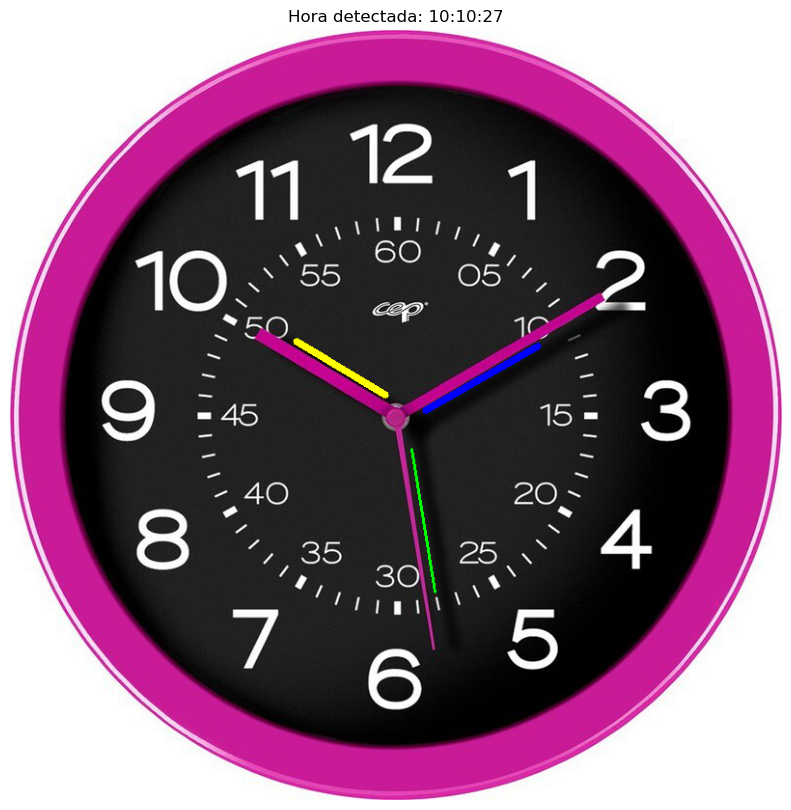

Son las diez con 10 minutos y 27 segundos.


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imagen_bgr = cv2.imread('reloj7.jpg')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
gris = cv2.GaussianBlur(gris, (7,7), 5)
gris = cv2.bilateralFilter(gris, 20, 150, 150)
gris = cv2.medianBlur(gris, 5)
gris = cv2.equalizeHist(gris)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gris, cmap='gray')
plt.title('Imagen en gris')

bordes = cv2.Canny(gris, 100, 180)
plt.subplot(1, 2, 2)
plt.imshow(bordes, cmap='gray')
plt.title('Bordes (Canny)')
plt.show()

lineas = cv2.HoughLinesP(bordes, 1, np.pi / 180, 80, minLineLength=50, maxLineGap=10)

centro_x = imagen_bgr.shape[1] // 2
centro_y = imagen_bgr.shape[0] // 2

def calcular_angulo(x1, y1, x2, y2):
    dist1 = np.hypot(x1 - centro_x, y1 - centro_y)
    dist2 = np.hypot(x2 - centro_x, y2 - centro_y)
    if dist1 > dist2:
        dx = x1 - centro_x
        dy = centro_y - y1
    else:
        dx = x2 - centro_x
        dy = centro_y - y2
    angulo = np.degrees(np.arctan2(dy, dx))
    return (90 - angulo) % 360

manecillas = []
if lineas is not None:
    for linea in lineas:
        x1, y1, x2, y2 = linea[0]
        longitud = np.hypot(x2 - x1, y2 - y1)
        distancia_centro = min(np.hypot(x1 - centro_x, y1 - centro_y), np.hypot(x2 - centro_x, y2 - centro_y))
        if distancia_centro < 100 and 40 < longitud < 300:
            angulo = calcular_angulo(x1, y1, x2, y2)
            manecillas.append({'puntos': (x1, y1, x2, y2), 'longitud': longitud, 'angulo': angulo})

if len(manecillas) >= 3:
    manecillas.sort(key=lambda x: x['longitud'])
    horario = manecillas[0]
    minutero = manecillas[1]
    segundero = manecillas[2]

    hora = int((horario['angulo'] / 30) % 12)
    minutos = int((minutero['angulo'] / 6) % 60)
    segundos = int((segundero['angulo'] / 6) % 60)

    fraccion_hora = (horario['angulo'] / 30) % 12
    if abs(fraccion_hora - hora) > 0.5:
        hora = (hora + 1) % 12

    imagen_resultado = imagen_rgb.copy()
    cv2.line(imagen_resultado, (horario['puntos'][0], horario['puntos'][1]), (horario['puntos'][2], horario['puntos'][3]), (255, 255, 0), 5)
    cv2.line(imagen_resultado, (minutero['puntos'][0], minutero['puntos'][1]), (minutero['puntos'][2], minutero['puntos'][3]), (0, 0, 255), 5)
    cv2.line(imagen_resultado, (segundero['puntos'][0], segundero['puntos'][1]), (segundero['puntos'][2], segundero['puntos'][3]), (0, 255, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(imagen_resultado)
    plt.title(f'Hora detectada: {hora}:{minutos:02d}:{segundos:02d}')
    plt.axis('off')
    plt.show()

    numeros = ["doce", "una", "dos", "tres", "cuatro", "cinco", "seis", "siete", "ocho", "nueve", "diez", "once"]
    hora_literal = numeros[hora]
    minutos_literal = f"{minutos} minuto{'s' if minutos != 1 else ''}"
    segundos_literal = f"{segundos} segundo{'s' if segundos != 1 else ''}"

    print(f"Son las {hora_literal} con {minutos_literal} y {segundos_literal}.")
